In [1]:
import warnings
warnings.filterwarnings('ignore')


from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
import numpy as np
import pandas as pd


In [3]:
#Lets inspect the data.

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
#Lets unpack the data and the target into variables X,y
columns=['sepal length','sepal width','petal length','petal width']
X,y=pd.DataFrame(iris.data,columns=columns),pd.DataFrame(iris.target,columns=['Species'])

In [5]:
##Lets inspect this data
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
#No null values in the data.All the predictor variables are floats

#Lets see summary statistics of the data

X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


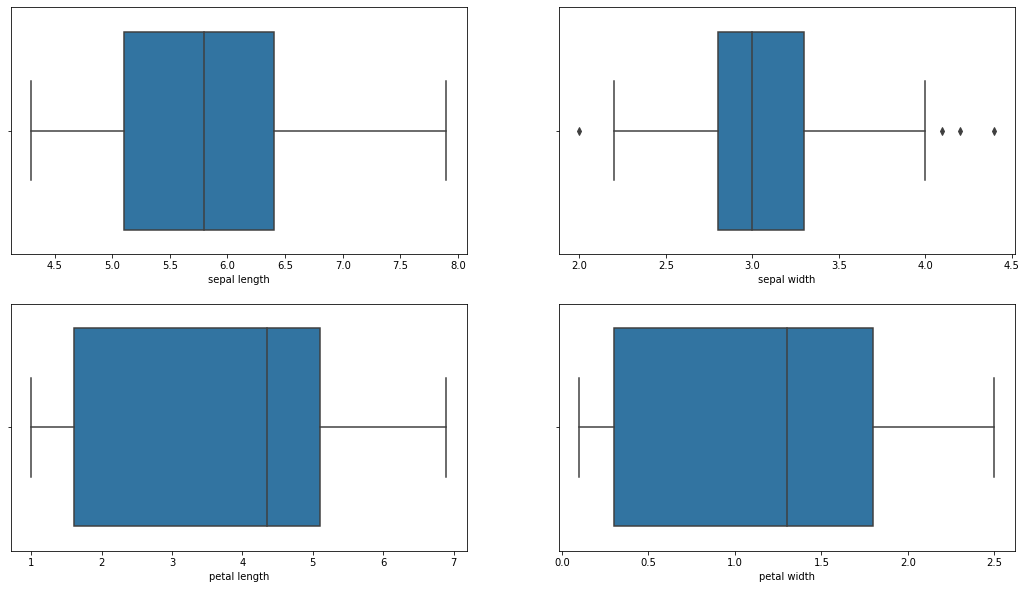

In [7]:
#lets check the distribution of the variables

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig,axes=plt.subplots(2,2,figsize=(18,10))

sns.boxplot(X['sepal length'],ax=axes[0,0])
sns.boxplot(X['sepal width'],ax=axes[0,1])
sns.boxplot(X['petal length'],ax=axes[1,0])
sns.boxplot(X['petal width'],ax=axes[1,1])

In [8]:
##There are not many outliers in the data.Only the --sepal length has four outliers.We will leave them untreated for now.

##Lets inspect the target varibale.

#Lets check the number of classes here.

y['Species'].unique().tolist()


[0, 1, 2]

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

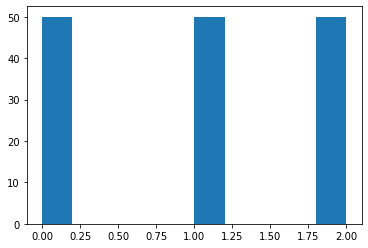

In [9]:
##So there are 3 classes.Now lets check the distribution.

plt.hist(y['Species'])

In [10]:
##Lets check the correlation between the various predictor variables and the Species

all=X.join(y)

In [11]:
all

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


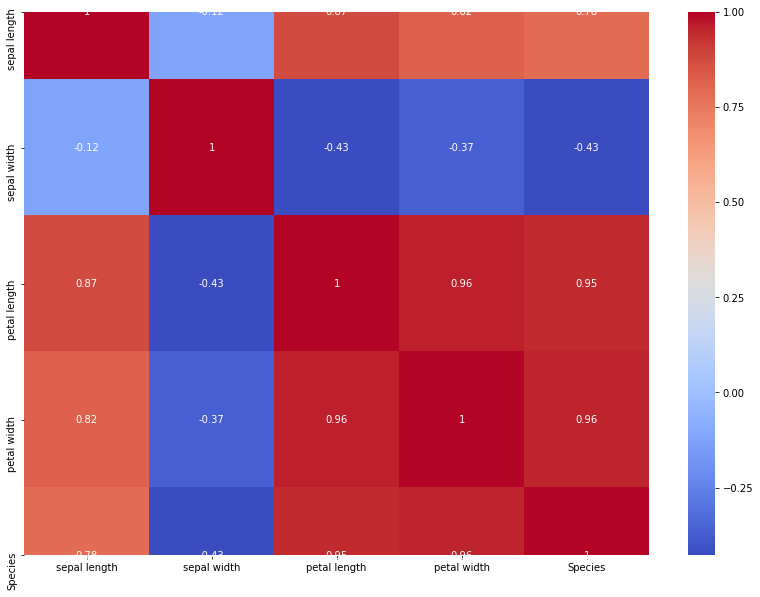

In [12]:
corrmat=all.corr()
corrmat

plt.subplots(figsize=(14,10))

sns.heatmap(corrmat,annot=True,cmap='coolwarm')

plt.show()

In [13]:
##Petal length and petal width have a very high correlation.So we will drop petal length

X=X.drop(['petal length'],axis=1)


In [14]:
X

,sepal length,sepal width,petal width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2
...,...,...,...
145,6.7,3.0,2.3
146,6.3,2.5,1.9
147,6.5,3.0,2.0
148,6.2,3.4,2.3


In [15]:
###All the classes are equal in numbers.This info was there in the dataset description but always good to check.
#This is an example of balanced classes.
##this dataset is pretty neat with little requirement of preprocessing.
##Create train and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)






In [16]:
###I will start the prediction exercise with the k neighbors classifiers

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


#Number of k from 1 to 20
k_range=range(1,20)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())






Text(0, 0.5, 'Cross-Validation_score')

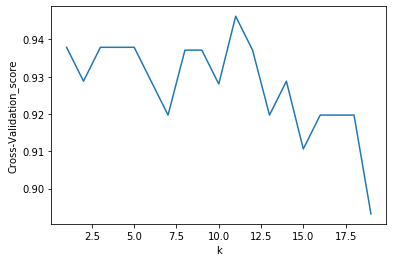

In [17]:
#We will plot accuracy for every k

plt.plot(k_range,k_scores)
plt.xlabel('k')
plt.ylabel('Cross-Validation_score')

In [18]:
#The highest accuracy is for k=10.So we will predict using this

knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

##Evaluate the model


from sklearn import metrics
from sklearn.metrics import roc_auc_score

##Classification Report

print(metrics.classification_report(y_test,y_pred.round(),digits=3))

##Calculate cross val score with 'roc_auc_ovr'(one vs rest) as this is multiclass and folds=10
crossvalscore=cross_val_score(knn,X_train,y_train,scoring='roc_auc_ovr',cv=10)
print("crossvalscore:",crossvalscore.mean())

##roc_auc_score with multi-class parameter

rocaucscore=roc_auc_score(y_test,knn.predict_proba(X_test),multi_class='ovr')
print('rocaucscore:',rocaucscore)




              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      0.882     0.938     0.909        16
           2      0.875     0.778     0.824         9

    accuracy                          0.921        38
   macro avg      0.919     0.905     0.911        38
weighted avg      0.921     0.921     0.920        38

crossvalscore: 0.9874007936507937
rocaucscore: 0.9810950743062813


In [19]:
###Now we will try logistic regression.Logistic Regression is widely used for binary classification.Like default/no default.
#Here we will use it for multi-class classification.Here we need to classify in 3 classes--0,1,2.
#Hence I will use the parameters--multi_class='multinomial',solver='newton-cg'.
#When we calculate the cross_val_score for k-fold cross-validation we would use in scoring parameter--'roc_auc_ovr'.ovr stands for 
#one vs rest.In a multiclass classification that many classifiers are created as many classes we are trying to predict.
#Also while calculating the roc_auc_score we would use the multi_class parameter as 'ovr'

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(multi_class='multinomial',solver='newton-cg')

logreg.fit(X_train,y_train)
logreg.predict(X_test)

#Lets now evaluate the results

from sklearn.metrics import accuracy_score

print(metrics.classification_report(y_test,y_pred,digits=3))

print('accuracy:',accuracy_score(y_test,y_pred))

crossvalscore=cross_val_score(logreg,X_train,y_train,cv=10,scoring='roc_auc_ovr')
print('crossvalscore:',crossvalscore.mean())

rocaucscore=roc_auc_score(y_test,logreg.predict_proba(X_test),multi_class='ovr')
print('rocaucscore:',rocaucscore)




              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      0.882     0.938     0.909        16
           2      0.875     0.778     0.824         9

    accuracy                          0.921        38
   macro avg      0.919     0.905     0.911        38
weighted avg      0.921     0.921     0.920        38

accuracy: 0.9210526315789473
crossvalscore: 0.9901289682539683
rocaucscore: 0.9815903285730873


In [20]:
##Lets see what happens of we add polynomial features to the logistic regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Adding polynomial features to the logistic regression model

def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LogisticRegression(multi_class='multinomial',solver='newton-cg',**kwargs))

In [21]:
#We will add  4th degree polynomial features to the logistic regression problem

poly=PolynomialRegression(4)
poly.fit(X_train,y_train)

y_pred=poly.predict(X_test)

print(metrics.classification_report(y_test,y_pred,digits=3))

print('crossvalscore:',(cross_val_score(poly,X_train,y_train,cv=10,scoring='roc_auc_ovr').mean()))
      
print('rocaucscore:',roc_auc_score(y_test,poly.predict_proba(X_test),multi_class='ovr'))
      

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      0.938     0.938     0.938        16
           2      0.889     0.889     0.889         9

    accuracy                          0.947        38
   macro avg      0.942     0.942     0.942        38
weighted avg      0.947     0.947     0.947        38

crossvalscore: 0.9862103174603174
rocaucscore: 0.9933276732845698


In [22]:
#As we see the polynomial features have impoved the accuracy as well as the f1 score